In [151]:
import numpy as np
import matplotlib.pyplot as plt
import random, time
%matplotlib inline

In [2]:
def norm(x):
    return x / np.sum(x)

In [3]:
def s_func(x):
    y = np.where(np.eye(x.shape[0], x.shape[1]), np.zeros_like(x), x)
    a = np.sum(y, axis=0, keepdims=True)
    b = np.sum(y, axis=1, keepdims=True)
    c = np.divide(a, b, out=np.zeros_like(y), where=b!=0)
    return y * np.sqrt(c)

In [95]:
def c_func(x):
    y = np.where(np.eye(x.shape[0], x.shape[1]), np.zeros_like(x), x)
    return y * np.sqrt(np.sum(y, axis=1, keepdims=True) / np.sum(y, axis=0, keepdims=True))

In [154]:
z = norm(np.random.randint(0, 2, (6400, 6400)))

In [155]:
%%time
s_func(z) + np.where(np.eye(z.shape[0], z.shape[1]), z, np.zeros_like(z))

Wall time: 5.31 s


array([[4.88236598e-08, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.89374239e-08, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.85588259e-08, ...,
        0.00000000e+00, 4.87859144e-08, 0.00000000e+00],
       [4.83074748e-08, 4.92446909e-08, 4.88236598e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.94240679e-08, 4.94393671e-08],
       [4.85786979e-08, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.88236598e-08, 0.00000000e+00],
       [4.86777682e-08, 4.96221684e-08, 4.89461786e-08, ...,
        4.86469985e-08, 0.00000000e+00, 4.88236598e-08]])

In [4]:
def july(x, y):
    return(x * x - y * y, 2 * x * y - 0.2)

In [5]:
def get_num(x, y):
    global x_0, y_0, d, N
    y = np.where(x < x_0, 3, y)
    x = np.where(x < x_0, -3, x)
    
    y = np.where(x > -x_0, 3, y)
    x = np.where(x > -x_0, -3, x)
    
    x = np.where(y < -y_0, -3, x)
    y = np.where(y < -y_0, 3, y)
    
    x = np.where(y > y_0, -3, x)
    y = np.where(y > y_0, 3, y)
    
    i = ((y_0 - y) // d * N) + ((x - x_0) // d) + 1
    i = np.where(i < 0, 0, i)
    return i[np.where(i > 0)]
#     return i

In [6]:
# July function

def make_graph():
    global x_0, y_0, d, N
    d = 0.05
    N = int(4 / d)
    x_0, y_0 = -2, 2
    
    graph = {}
    pattern_x = np.ones((10, 10)) * np.array(range(1, 11)) * 0.1 * d - d / 20
    pattern_y = pattern_x.copy().transpose()
    n = 1
    y_n = y_0
    while(y_n > -y_0 + d + 0.0000001):
#         print(y_n, -y_0 + d)
        x_n = x_0
        y_n = y_0 - ((n - 1) // N) * d
        while(x_n < -x_0 - d - 0.0000001):
#             print(x_n, -x_0 - d + 0.001)
            x_n = x_0 + ((n - 1) % N) * d
#             print('1', x_n, y_n, n)
            s = set(np.unique(get_num(*july(x_n + pattern_x, y_n - pattern_y)).astype('int32')))
#             print('2', x_n, y_n, n)
            graph[n] = s
            n += 1
#         y_n -= d
    return graph

In [158]:
def dfs1(graph, v, comp, visited, leave):
    global cur_time
    visited[v] = True
    for e in graph[v]:
        if not visited[e]:
            dfs1(graph, e, comp, visited, leave)
    cur_time += 1
    leave[v] = cur_time
    comp.append(v)

In [159]:
def dfs2(graph, v, comp, visited):
    visited[v] = True
    for e in graph[v]:
        if not visited[e]:
            dfs2(graph, e, comp, visited)
    comp.append(v)

In [162]:
def topo(graph):
    global cur_time
    n = N * N
    
    visited = [False] * (n + 1)
    cur_time = 0
    leave = [0] * (n + 1)
    coms = []
    
    for i in range(1, n + 1):
        if (i in graph.keys() and (not visited[i])):
            comp = []
            dfs1(graph, i, comp, visited, leave)
            coms.append(comp)
            
    sorted_graph = list(np.argsort(np.array(leave)))[::-1]
    
    
    print(sorted_graph[0])
    
    i_graph = invert_graph(graph)
    no = 0
    
    visited = [False] * (n + 1)
    
    new_graph = []
    
    for v in sorted_graph[:-1]:
        if not visited[v]:
            
            co = []
            dfs2(i_graph, v, co, visited)
            h = co

            new_graph.append(h)
              
    return new_graph

In [164]:
def invert_graph(graph):
    i_graph = dict.fromkeys(graph.keys(), 0)
    for k, v in graph.items():
        for vertice in v:
            if i_graph[vertice]:
                i_graph[vertice].add(int(k))
            else:
                i_graph[vertice] = {int(k)}
    for k, v in i_graph.items():
        if v == 0:
            i_graph[k] = set()
    return i_graph

In [165]:
%%time
new_graph = topo(graph)

1478
Wall time: 206 ms


In [ ]:
for 

In [7]:
%%time
graph = make_graph()

Wall time: 1.44 s


In [8]:
len(graph)

6400

In [144]:
sh = N * N
matr = np.zeros((sh, sh))
# matr[-1, -1] = 1
for k in graph.keys():
    for v in graph[k]:
        matr[k - 1, v - 1] = 1
matr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
np.sum(matr)

1.0000000000000004

In [24]:
matr.shape

(6400, 6400)

In [124]:
matr = norm(matr)

In [147]:
%%time
for _ in range(5):
    matr = norm(matr)
    matr = s_func(matr) + np.where(np.eye(matr.shape[0], matr.shape[1]), matr, np.zeros_like(matr))

Wall time: 30.3 s


In [22]:
matr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

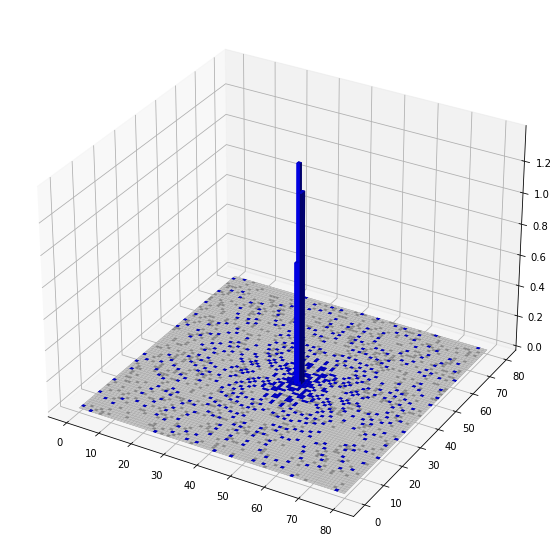

In [153]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(998)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# x, y = np.random.rand(2, 100) * 10
# x, y = np.array([[1, 2, 3], [1, 2, 3]])
# xedges, yedges = np.array(range(0, 4)), np.array(range(0, 4))
# hist = np.array([[1, 1, 1], [2, 7, 2], [0, 3, 0]])
hist = np.sum(matr, axis=0)
# hist, xedges, yedges = np.histogram2d(x, y, bins=3, range=[[0, 3], [0, 3]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(range(0, 80), range(0, 80), indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = np.ones_like(zpos)
dz = hist.ravel()

color = np.where(dz > 0.000001, "blue", "white")
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color=color)

plt.savefig("image_8.png")
plt.show()

In [133]:
np.random.rand(2, 10) * 10

array([[9.56562479, 6.63102611, 3.86877597, 2.12243485, 7.00822338,
        8.15825142, 7.74676972, 7.17101226, 7.61460708, 8.51986076],
       [1.95154737, 7.68294558, 9.97987055, 9.10113634, 4.34764588,
        3.48362714, 0.21160604, 5.73738865, 1.43453926, 4.49009628]])

In [94]:
hist

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 2.]])

In [95]:
xedges

array([0., 1., 2., 3.])

In [116]:
color

array(['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue',
       'red'], dtype='<U4')